In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from original_dataset import create_datasets

In [2]:
import torch
import random
from engine import run

params = {
    # Dataset
    'img_dir': './data/original_images/',                    # Images path
    'label_dir': './data/original_labels/',                  # Labels path
    'train_val_split': 0.2,             # Train/validation split
    'use_transforms': False,            # Use data augmentation
    'dataset': 'artificial',
    'img_art_dir': './data/artificial_images_5/',
    'label_art_dir': './data/artificial_labels_5/',
    # Model
    'model_layers': (3, 3, 3),          # Number of residual blocks at each layer of the model
    'model_channels': (16,32,64),       # Number of channels at each layer
    'model_type': 'unet',               # Model to use
    # Training
    'epochs': 0,
    'lr': 0.01,
    'batch_size_train': 8,
    'batch_size_valid': 5, 
    'momentum': 0.9,                    # Momentum for optimizer
    'weight_decay': 0.,
    'seed': 12,                         # Seed for random number generators
    'loss': 'cross_entropy',
    'scheduler_power': 0.9,             # Power por the polynomial scheduler
    'class_weights': (0.367, 0.633),    # Weights to use for cross entropy
    # Efficiency
    'device': 'cuda',
    'num_workers': 3,                   # Number of workers for the dataloader
    'use_amp': True,                    # Mixed precision
    'pin_memory': False,            
    'non_blocking': False,
    # Logging
    'log_dir': 'logs_unet',             # Directory for logging metrics and model checkpoints
    'experiment':'unet_l_3_c_16_32_64', # Experiment tag
    'save_every':1,                     # Number of epochs between checkpoints
    'save_best':True,                   # Save model with best validation loss
    'meta': None,                       # Additional metadata to save
    # Other
    'resume': False,                    # Resume from previous training
}

In [3]:
logger, ds_train, ds_valid, model = run(params)

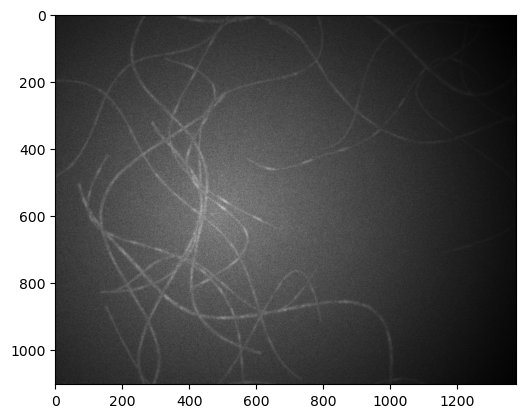

tensor(13.0110) tensor(0.) torch.float32


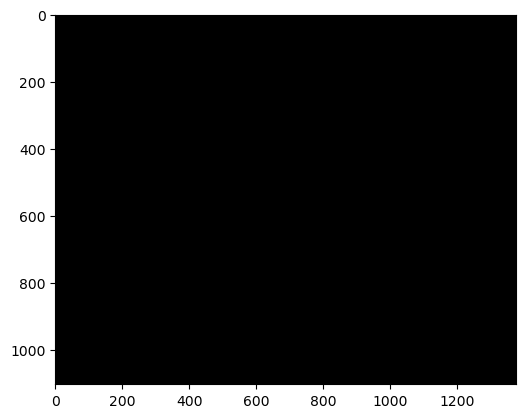

In [24]:
img = ds_train[0][0]
plt.imshow(img[0], 'gray')
plt.show()
print(img.max(), img.min(), img.dtype)
negative = (img[0] < 0)
plt.imshow(negative, 'gray')
plt.show()